<a href="https://colab.research.google.com/github/mikolajjesion/20newsgroups/blob/main/BEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langid

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from langid.langid import LanguageIdentifier, model
from sklearn.datasets import fetch_20newsgroups

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Load dataset
dataset = fetch_20newsgroups(subset='all')

In [ ]:
type(dataset)

sklearn.utils.Bunch

In [ ]:
df = pd.DataFrame(
    {
        'text' : pd.Series(dataset.data), 
        'target' : pd.Series(dataset.target)
    }
)

In [ ]:
df.head()

,text,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [ ]:
print(df.text.values[3])

From: guyd@austin.ibm.com (Guy Dawson)
Subject: Re: IDE vs SCSI, DMA and detach
Originator: guyd@pal500.austin.ibm.com
Organization: IBM Austin
Lines: 60


In article <1993Apr19.034517.12820@julian.uwo.ca>, wlsmith@valve.heart.rri.uwo.ca (Wayne Smith) writes:
> In article <RICHK.93Apr15075248@gozer.grebyn.com> richk@grebyn.com (Richard Krehbiel) writes:
> >>     Can anyone explain in fairly simple terms why, if I get OS/2, I might 
> >>   need an SCSI controler rather than an IDE.  Will performance suffer that
> >>   much?  For a 200MB or so drive?  If I don't have a tape drive or CD-ROM?
> >>   Any help would be appreciated.
> 
> >So, when you've got multi-tasking, you want to increase performance by
> >increasing the amount of overlapping you do.
> >
> >One way is with DMA or bus mastering.  Either of these make it
> >possible for I/O devices to move their data into and out of memory
> >without interrupting the CPU.  The alternative is for the CPU to move
> >the data.  There are seve

### Let's check languages

In [ ]:
%%time

lang_identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
df['lang'] = df['text'].apply(lambda x: lang_identifier.classify(x)[0])

CPU times: user 1min 47s, sys: 1min 17s, total: 3min 4s
Wall time: 1min 35s


In [ ]:
df.lang.value_counts()

en    18791
rw       18
no        6
de        6
id        3
fr        3
sv        2
mt        2
cy        2
nl        2
mg        1
an        1
tl        1
es        1
af        1
nn        1
tr        1
eo        1
it        1
oc        1
sk        1
Name: lang, dtype: int64

In [ ]:
df[df.lang != 'en'].text.values[0]

"From: kthompso@donald.WichitaKS.NCR.COM (Ken Thompson)\nSubject: Re: 68HC11 problem\nOrganization: NCR Corporation Wichita, KS\nLines: 21\n\nmdanjou@gel.ulaval.ca (Martin D'Anjou) writes:\nB\n)>>>>>>>>> Votre host est mal configure... <<<<<<<<<<<<\n\n\n)Bonjour Sylvain,\n)\tJ'ai travaille avec le hc11 il y a 3 ans et je ne me souviens pas de toutes les possibilites mais je vais quand meme essayer de t'aider.\n\n)\tJe ne crois pas que downloader une programme directement dans le eeprom soit une bonne idee (le eeprom a une duree de vie limitee a 10 000 cycles il me semble). Le communication break down vient peut-etre du fait que le eeprom est long a programmer (1ms par 8 bytes mais c'est a verifier) et que les delais de transfer de programme s19 vers la memoire sont excedes. Normalement, les transferts en RAM du code s19 est plus rapide car le RAM est plus rapide que le eeprom en ecriture.\n\n)\tC'est tout ce que ma memoire me permet de me souvenir!\n\n)Bonne chance,\n\nOh yeah easy for

In [ ]:
df[df.lang != 'en'].text.values[1]

'From: weidlich@arb-phys.uni-dortmund.de (Weidlich)\nSubject: Searching for a phonetic font\nOrganization: Institut f. Arbeitsphysiologie a.d. Uni Dortmund\nLines: 13\n\nI\'m searching for a phonetic TrueType font for Windows 3.1. If \nanybody knows one, please mail me!\n\nThanks.\n\ndw \n\n\n##################################################################\nDipl.-Inform. Dietmar Weidlich    # IfADo, Ardeystr. 67          #\nweidlich@arb-phys.uni-dortmund.de # D-4600 Dortmund 50           #\nPhone ++49 231 1084-250           # >> Dr. B.: "Koennten Sie das #\nFax   ++49 231 1084-401           #      MAL EBEN erledigen?" << #\n'

In [ ]:
df[df.lang != 'en'].text.values[3]

'From: Jinmo Ahn <ja2f+@andrew.cmu.edu>\nSubject: Maxtor 660MB SCSI\nOrganization: Senior, Math/Computer Science, Carnegie Mellon, Pittsburgh, PA\nLines: 10\nNNTP-Posting-Host: po3.andrew.cmu.edu\n\n\nMaxtor XT8670S  660 MB SCSI Drive\n16ms access time\n2 years old\nExternal Casing\n\n$777\n\nja2f+@andrew.cmu.edu\n412-268-7505\n'

In [ ]:
df = df[df.lang == 'en']

### Text cleaning

In [ ]:
def clean_text(text):
    custom_stopwords = ['from', 'subject', 'organization', 'nntppostinghost',
                       'keywords','lines','one','use']
    stop_words = set(stopwords.words("english")+custom_stopwords)
    
    text = text.lower()
    text = " ".join([word for word in text.split()])
    
    #Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    #Remove mentions
    text = re.sub("@\S+", "", text)
    #Remove urls
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    #Remove hashtags
    text = re.sub("#", "", text)
    #Remove punctuations
    punct = set(string.punctuation) 
    text = "".join([ch for ch in text if ch not in punct])
    #Remove numbers
    text = " ".join([re.sub(r'[0-9]+', '', word) for word in text.split()])
    #Remove single char
    text = re.sub(r'\s+\w{1}\s+', '', text)
    #Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text.strip()

In [ ]:
#tests
doc = 1

print(df.text.values[doc])

print('-----------------------')

print(clean_text(df.text.values[doc]))

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

-----------------------
mblawson mat

In [ ]:
df['Cleaned text'] = df.text.apply(clean_text)

### Wordcloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

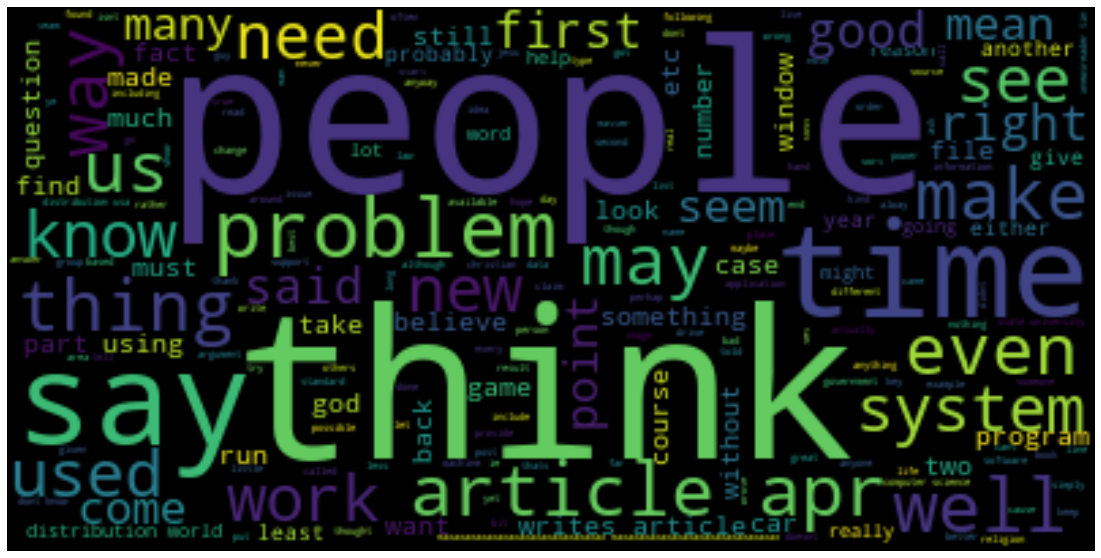

In [ ]:
plt.figure(figsize=(20,10))
wordcloud = WordCloud().generate(' '.join(df['Cleaned text'].values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Topic modeling

#### First method - Clustering with embeddings:
 - CountVectorizer,
 - TfidVectorizer,
 - fasttext

In [ ]:
!pip install fasttext

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import fasttext.util

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
def clustering(data, c_range):
    wcss = []
    scss = []
    for k in c_range:
        km = KMeans(k)
        km.fit(data) 
        wcss.append(km.inertia_)
        scss.append(silhouette_score(data, km.predict(data)))
    
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(c_range, wcss)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia') 
    plt.subplot(1, 2, 2)
    plt.plot(c_range, scss)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

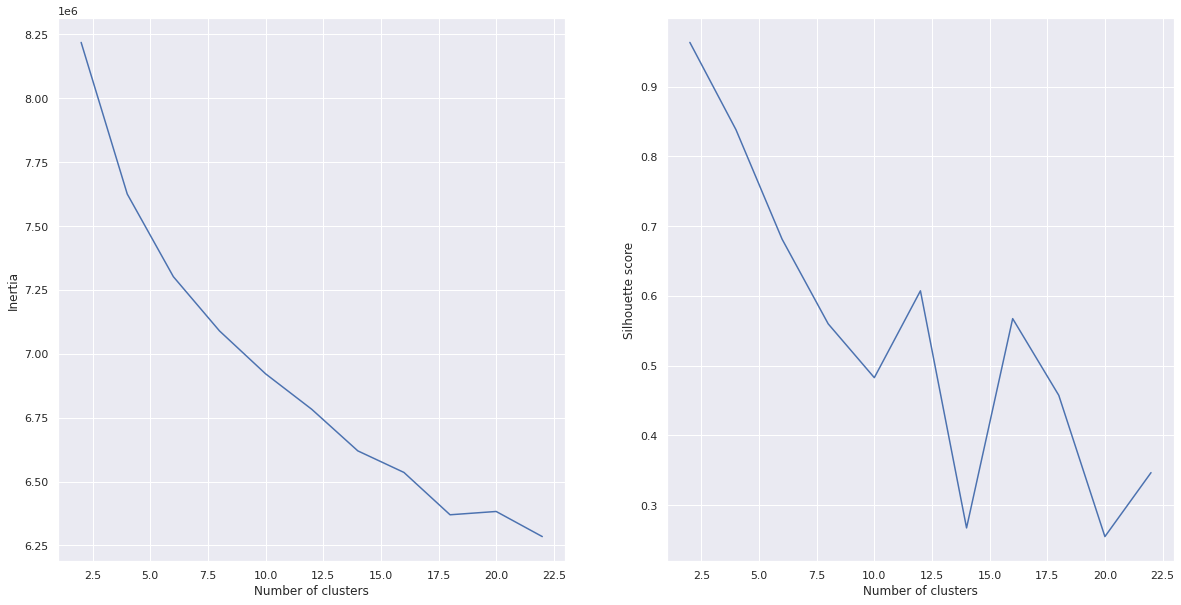

In [ ]:
bow = CountVectorizer()

cvdata = bow.fit_transform(df['Cleaned text'].values)

clustering(cvdata, range(2,24,2))

### From the elbow plot and the silhouette plot, we can see that 12, 16 as the number of clusters is the best option. 
###
### Let's try TfidfVectorizer

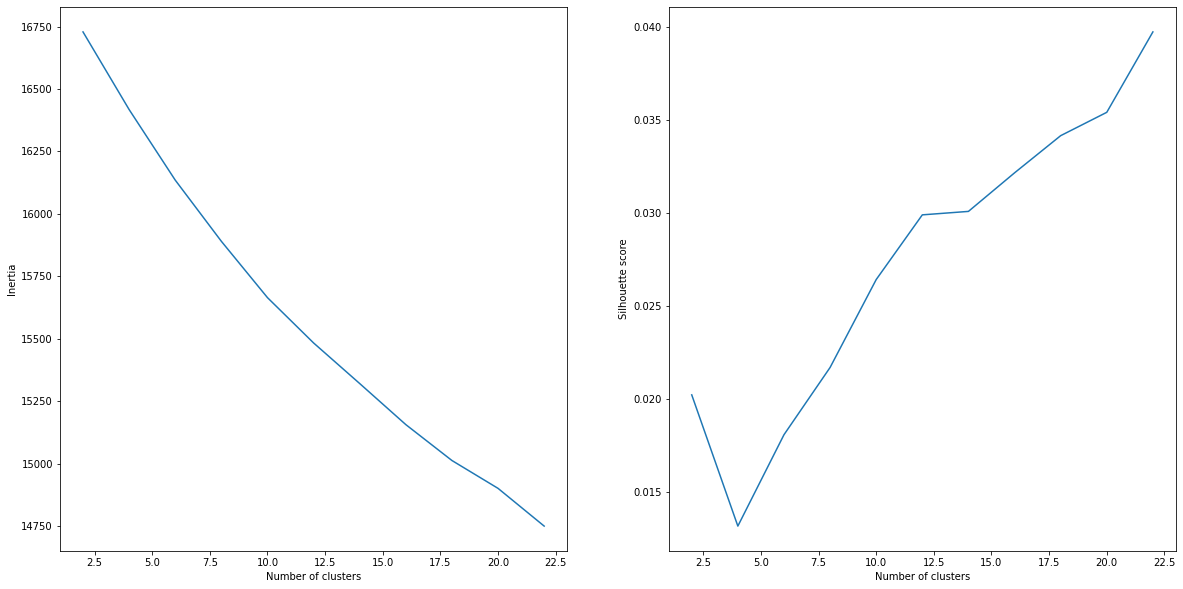

In [ ]:
tfv = TfidfVectorizer(max_features=200)
tvdata = tfv.fit_transform(df['Cleaned text'].values)

clustering(tvdata, range(2,24,2))

### TfidfVectorizer shows no good grouping. The silhouette score is too low. Perhaps, after tuning the model, it would be better.
###
### Let's try pretrained word vectors from fasttext (I did that locally on my machine, because I had fasttext word vectors)

In [ ]:
# fasttext.util.download_model('en', if_exists='ignore')
# ft_model = fasttext.load_model("cc.en.300.bin")

In [ ]:
# def get_fasttext_embeddings(data):
#     embedded = []
#     for text in data:
#         embedded.append(ft_model.get_sentence_vector(text).reshape(1, 300))
#     return pd.DataFrame(np.array(embedded).reshape(data.shape[0], 300))

In [ ]:
# ft_text = get_fasttext_embeddings(df['Cleaned text'])

# print(ft_text.shape)
# clustering(ft_text, range(2,24,2))

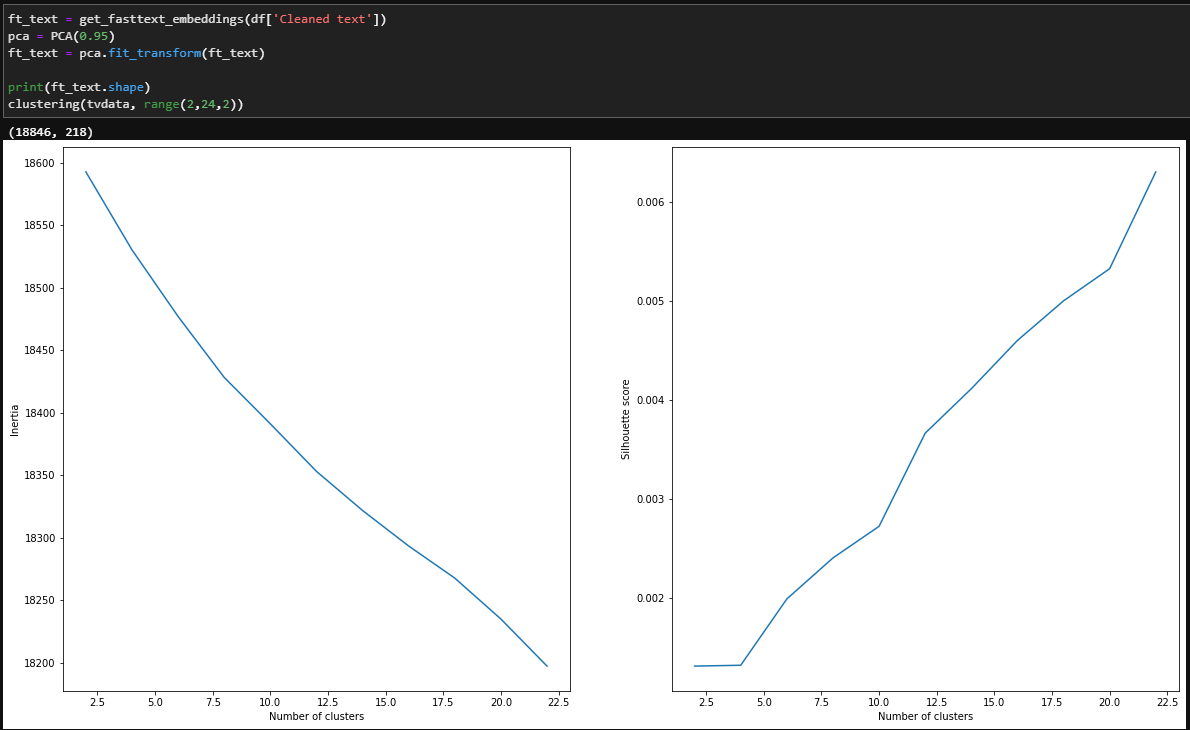

### Fasttext shows no good grouping. The silhouette score is too low.
###
### Now I will use Word2vec to train my own embedding

In [ ]:
def split_seq(text):
    return [t for t in text.split() if len(t) >= 2]
splited = df['Cleaned text'].apply(split_seq)

In [ ]:
size=100
model = Word2Vec(splited.values, min_count=5, window = 3, size = size)

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=splited.values, model=model,
                                             num_features=size)
df_vec = pd.DataFrame(w2v_feature_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
model.similar_by_word('mail')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('email', 0.8715375065803528),
 ('metsrequest', 0.8640447854995728),
 ('requests', 0.8629434108734131),
 ('subscribe', 0.8503259420394897),
 ('send', 0.8471053838729858),
 ('listserv', 0.8422749042510986),
 ('graphicsoriented', 0.8381589651107788),
 ('addresses', 0.8375179171562195),
 ('address', 0.8331757187843323),
 ('llama', 0.8303326964378357)]

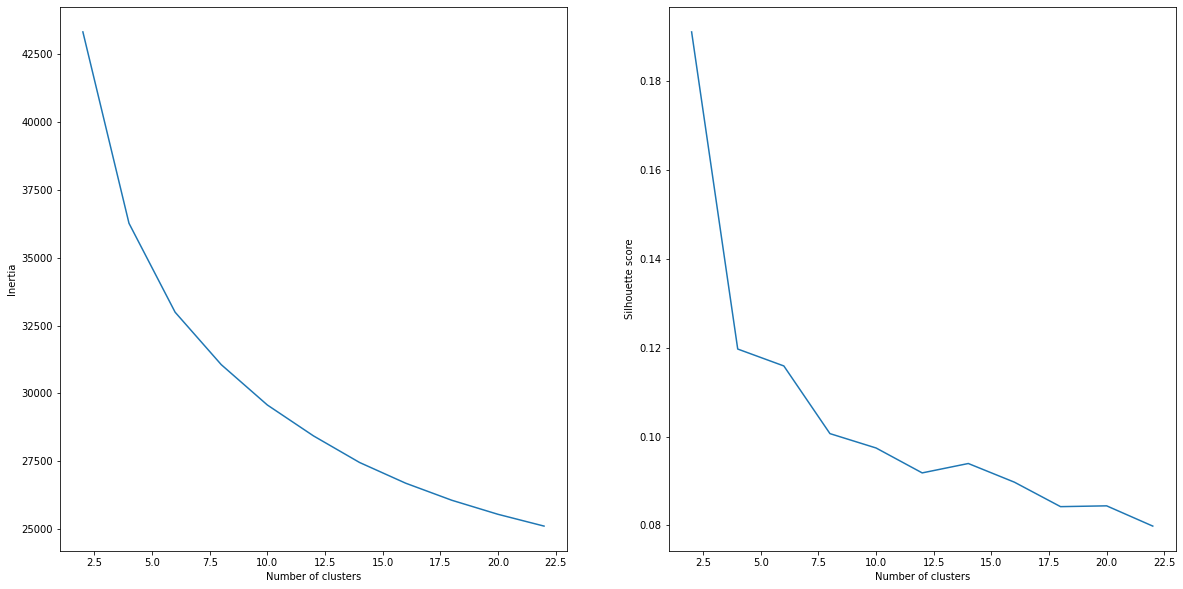

In [ ]:
clustering(df_vec, range(2,24,2))

### Word2Vec word2vec seems to be better than fasttext, but still much worse than regular CountVectorizer. Let's build final model with CountVectorizer.

In [ ]:
km = KMeans(12)
km.fit(cvdata)

df['KMeans group'] = km.predict(cvdata)

### Most common words in each group

In [ ]:
def bagOfWords(model, data):
    bag_of_words = model.transform(data)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in model.vocabulary_.items()]
    return sorted(words_freq, key = lambda x: x[1], reverse=True)

for cl in df['KMeans group'].unique():
  data_temp = df[df['KMeans group'] == cl]['Cleaned text']
  temp = pd.DataFrame.from_records(bagOfWords(bow, data_temp), columns = ['word', 'freq'])
  print(f'most common words in group {cl}:', ', '.join(temp.word[:20].values))

most common words in group 3: writes, would, article, university, like, get, know, people, apr, im, think, new, also, time, good, could, distribution, well, anyone, may
most common words in group 0: would, people, god, like, us, think, also, know, even, may, time, say, see, good, could, well, many, way, get, right
most common words in group 5: people, think, president, myers, ms, said, would, well, us, know, going, new, say, time, go, also, like, many, work, two
most common words in group 10: file, information, may, also, system, new, number, data, program, available, space, used, encryption, entry, health, ftp, email, us, privacy, internet
most common words in group 8: jpeg, image, file, gif, images, format, version, quality, color, files, free, see, programs, available, software, bit, also, may, get, jfif
most common words in group 6: available, image, data, also, system, software, file, version, get, ftp, window, widget, set, files, sun, display, information, graphics, program, moti

In [ ]:
topic_description_km = {
    '0':'People',
    '1':'George Stephanopoulos',
    '2':'Firearms',
    '3':'University articles',
    '4':'University',
    '5':'President',
    '6':'Image - software',
    '7':'Armenians',
    '8':'file system',
    '9':'Graphics',
    '10':'IT',
    '11':'Religion'
}

df['KMeans group'] = df['KMeans group'].astype(str)
df['KMeans group'] = df['KMeans group'].map(topic_description_km)

### Second approach: LDA model

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
docs = df['Cleaned text'].values

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = tokenizer.tokenize(str(docs[idx]))  # Split into words.

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [ ]:
# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 100 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=100, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
# Set training parameters.
def lda(ntopics):
    num_topics = ntopics
    chunksize = 2000
    passes = 50
    iterations = 400
    eval_every = None

    # Make a index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    return coherence_lda

In [ ]:
coherences = []
x = np.arange(6,24,2)

for tk in x:
    coherence_lda = lda(tk)
    coherences.append(coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


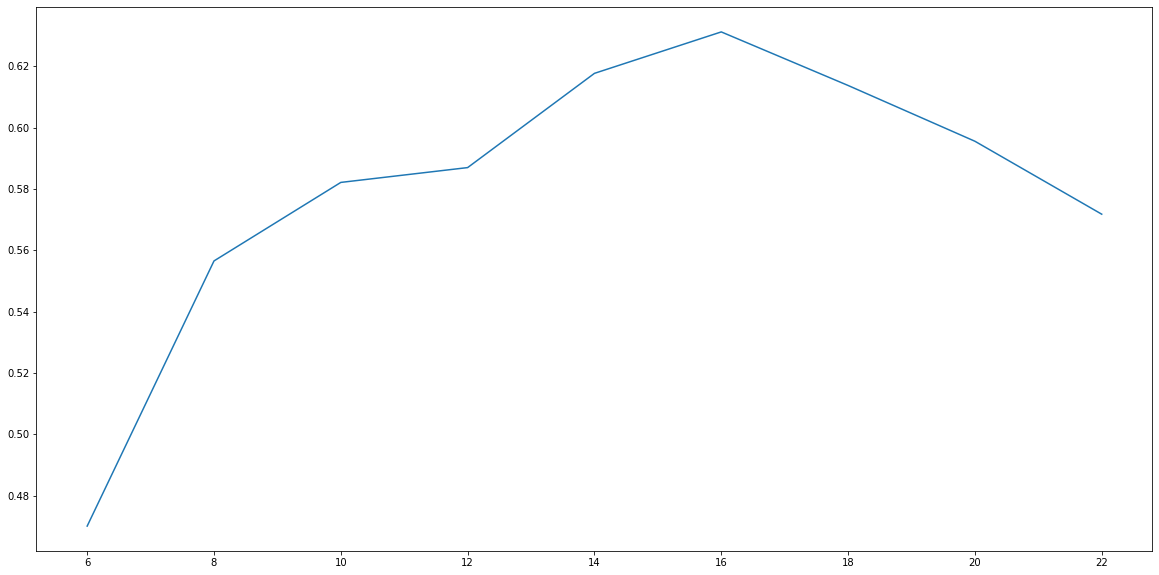

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x, coherences)
plt.show()

### Conclusion: LDA model is the best with k = 16.

In [ ]:
num_topics = 16
chunksize = 2000
passes = 50
iterations = 400
eval_every = None

temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.6168575669711794


In [ ]:
topics = sorted(model.get_document_topics(corpus[2]),key=lambda x:x[1],reverse=True)

df['LDA group'] = [sorted(model.get_document_topics(doc),key=lambda x:x[1],reverse=True)[0][0] for doc in corpus]

In [ ]:
df['LDA group'].value_counts()

9     7261
12    2085
14    1274
1     1244
2     1025
10    1005
7      886
4      778
0      635
5      618
15     605
11     387
13     371
3      271
8      208
6      138
Name: LDA group, dtype: int64

### Checking most common words in each group

In [ ]:
model.print_topics( num_words=15)

[(0,
  '0.016*"armenian" + 0.014*"israel" + 0.012*"jew" + 0.010*"people" + 0.010*"war" + 0.010*"israeli" + 0.009*"muslim" + 0.008*"arab" + 0.008*"turkish" + 0.007*"said" + 0.007*"jewish" + 0.006*"world" + 0.006*"greek" + 0.005*"right" + 0.005*"u"'),
 (1,
  '0.031*"file" + 0.022*"image" + 0.017*"window" + 0.016*"program" + 0.009*"version" + 0.009*"application" + 0.009*"available" + 0.008*"color" + 0.008*"graphic" + 0.008*"software" + 0.008*"display" + 0.008*"also" + 0.008*"ftp" + 0.008*"format" + 0.007*"using"'),
 (2,
  '0.037*"game" + 0.024*"team" + 0.017*"player" + 0.016*"year" + 0.011*"play" + 0.010*"win" + 0.010*"fan" + 0.010*"hockey" + 0.010*"season" + 0.009*"last" + 0.008*"first" + 0.007*"league" + 0.007*"baseball" + 0.007*"run" + 0.007*"go"'),
 (3,
  '0.013*"study" + 0.012*"drug" + 0.012*"medical" + 0.011*"number" + 0.010*"health" + 0.010*"year" + 0.010*"disease" + 0.009*"food" + 0.009*"rate" + 0.009*"insurance" + 0.009*"child" + 0.009*"effect" + 0.009*"patient" + 0.009*"doctor" 

In [ ]:
topic_description = {
    '0':'World conflicts',
    '1':'Applications',
    '2':'Game',
    '3':'Medicine',
    '4':'Cars, bikes',
    '5':'Monitors',
    '6':'US President',
    '7':'Government, gun law',
    '8':'US University books',
    '9':'Unknown',
    '10':'Hardware',
    '11':'Space science',
    '12':'University',
    '13':'University articles',
    '14':'Religion',
    '15':'IT'
}

In [ ]:
df['LDA group'] = df['LDA group'].astype(str)
df['LDA group'] = df['LDA group'].map(topic_description)

### CountVectorizer and LDA comparision

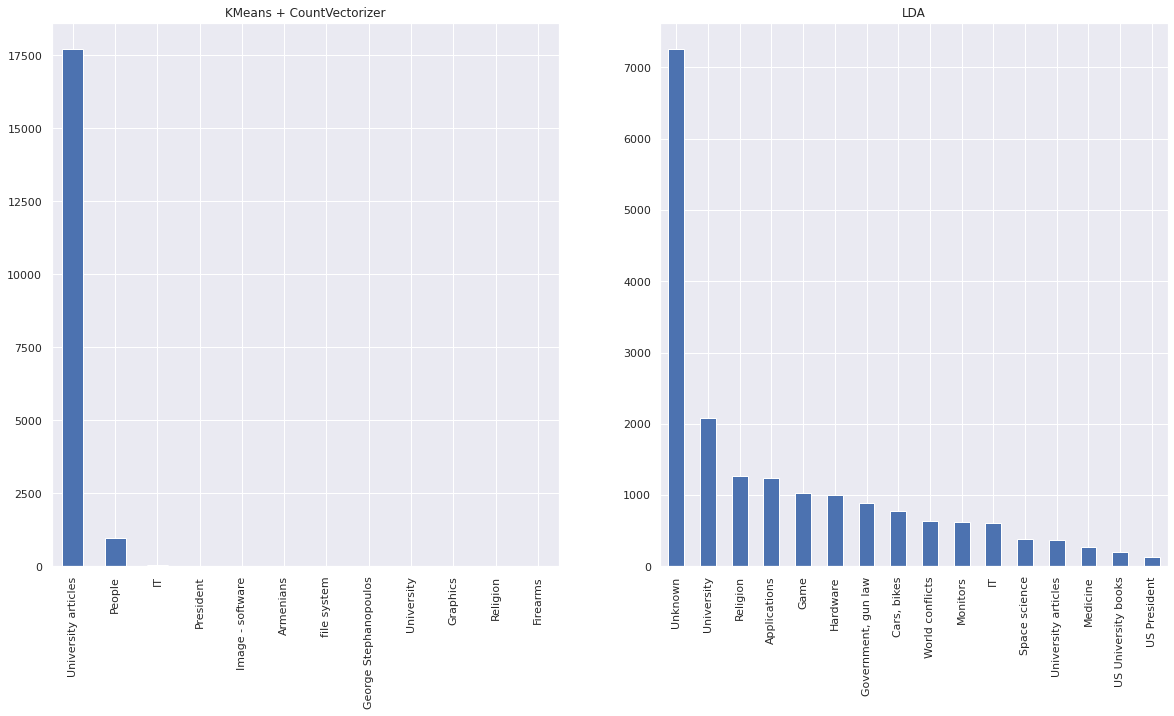

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('KMeans + CountVectorizer')
df['KMeans group'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title('LDA')
df['LDA group'].value_counts().plot(kind='bar')
plt.show()

### Conclusions
 - Countvectorizer with KMeans algorithm was better than other embedding methods if we are looking on silhouette score. But When I display the number of articles for the created groups in the graph, you can see that something went wrong during clustering or preprocessing
 - LDA as always is a good option for topic modeling. We have quite good distribution of articles. There is one group that is difficult to name. Could use better preprocessing in the future to remove noise-generating words.


### In this case, I would use the LDA model. In the next step, I would focus on better preprocessing and fine-tuning the model parameters for a higher coherence score